In [12]:
path_normal = "/vol/aimspace/users/kaiserj/Individual_Privacy_Accounting/results_full_vs_diag_vs_kfac/kl_jax_torch_1000_remove_1000_dataset_cifar10compressed_model_TinyModel_laptypediag_subset_50000_range_0_5000_corrupt_0.0_corrupt_data_0.0_0_torch.pkl"
path_sam = "/vol/aimspace/users/kaiserj/Individual_Privacy_Accounting/results_SAM/kl_jax_torch_1000_remove_1000_dataset_cifar10compressed_model_Tinymodel_subset_50000_range_0_1000_corrupt_0.0_corrupt_data_0.0_0_SAM.pkl"

paths = [path_normal, path_sam]
tags = ["Normal SGD", "Sharpness-Aware-Minimization"]



In [13]:
import pickle
import numpy as np

def get_kl_data(final_path, agg_type, rand=False):
    with open(final_path, 'rb') as file:
        final_dict = pickle.load(file)
    kl_data = final_dict[agg_type][0]
    idx = final_dict["idx"][0]
    return kl_data

In [14]:
kl_data = [get_kl_data(path, "kl") for path in paths]

min_length = min([len(data) for data in kl_data])

kl_data = [data[:min_length] for data in kl_data]

<Figure size 640x480 with 0 Axes>

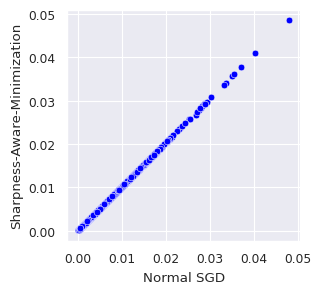

Spearman Rank Correlation: 1.0000


In [16]:
import matplotlib.pyplot as plt
import scipy.stats as stats
import seaborn as sns

# Set Seaborn theme with paper context and font scale
sns.set_theme(context="paper", font_scale=2)
sns.despine()
sns.set_context("paper", rc={"lines.linewidth": 2})

# Create a DataFrame for the plotting
import pandas as pd
data = pd.DataFrame({
    'x': kl_data[0],
    'y': kl_data[1]
})

# Plotting using Seaborn's scatterplot
plt.figure(figsize=(3, 3))
sns.scatterplot(data=data, x='x', y='y', color='blue')  # Using color directly instead of a palette
plt.xlabel(tags[0])
plt.ylabel(tags[1])
plt.grid(True)
plt.show()

# Computing Spearman rank correlation
spearman_corr, _ = stats.spearmanr(kl_data[0], kl_data[1])
print(f'Spearman Rank Correlation: {spearman_corr:.4f}')